In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 30)

# Basic Graph

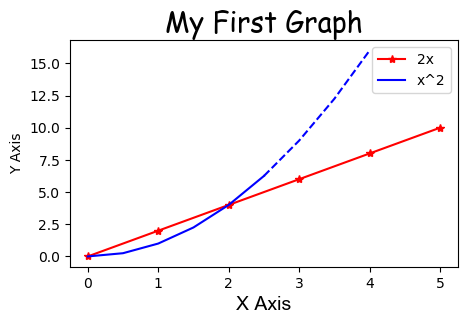

In [2]:
x = [0,1,2,3,4,5]
y = [0,2,4,6,8,10]

plt.figure(figsize = (5,3), dpi = 100)
#plt.plot(x,y, label = '2x', color = 'red', linewidth = 1, linestyle = '--', marker = '.', markersize = 10, markeredgecolor = 'blue')

# use shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x, y, 'r*-', label = '2x')


# Line Number Two
x2 = np.arange(0, 4.5, 0.5)
plt.plot(x2[:6], x2[:6]**2, 'b', label = 'x^2')
plt.plot(x2[5:], x2[5:]**2, 'b--')

plt.title("My First Graph", fontdict = {'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.xlabel("X Axis", fontdict = {'fontname': 'Arial', 'fontsize': 14})
plt.ylabel("Y Axis")

plt.xticks([0,1,2,3,4,5])
#plt.yticks([0,2,4,6,8,10])

plt.legend()

plt.savefig('./figs/myfirstgraph.png', dpi = 300)
plt.show()

# Bar Chart

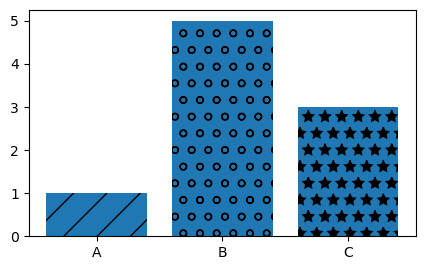

In [3]:
labels = ['A', 'B', 'C']
values = [1,5,3]

plt.figure(figsize = (5,3), dpi = 100)
bars = plt.bar(labels, values)

patterns = ['/', 'o', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))
    
# bars[0].set_hatch('/')
# bars[1].set_hatch('o')
# bars[2].set_hatch('*')

plt.savefig('./figs/myfirstbar.png')
plt.show()

# Line Graph

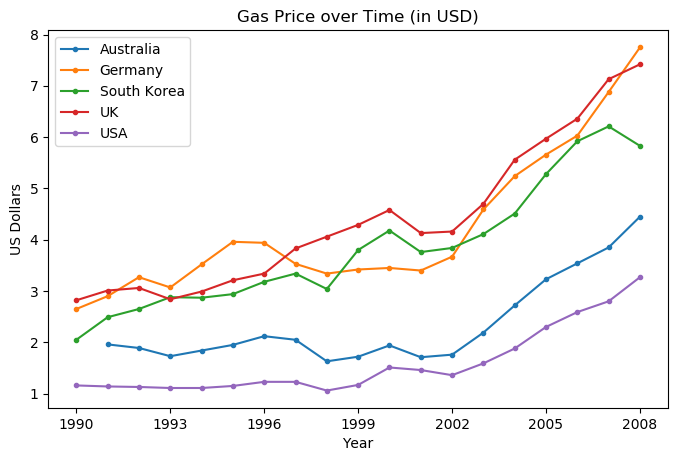

In [4]:
gas = pd.read_csv('./data/gas_prices.csv')

plt.figure(figsize = (8,5), dpi = 100)

plt.title('Gas Price over Time (in USD)')

# show country one by one
# plt.plot(gas.Year, gas.USA, 'b.-', label = 'United States')
# plt.plot(gas.Year, gas.Canada, 'r.-',label = 'Canada')
# plt.plot(gas['Year'], gas['South Korea'], 'g.-',label = 'South Korea')
# plt.plot(gas['Year'], gas['Australia'], 'y.-',label = 'Australia')

# show all countries
# for country in gas:
#     if country != 'Year':
#         plt.plot(gas.Year, gas[country], '.-', label = country)

countries_to_look_at = ['USA', 'South Korea', 'Australia', 'Germany', 'UK']

for country in gas:
    if country in countries_to_look_at:
        plt.plot(gas['Year'], gas[country], '.-',label = country)

    
plt.xticks(gas.Year[::3])
plt.xlabel('Year')
plt.ylabel('US Dollars')
plt.legend()

plt.savefig('./figs/gas_price.png', dpi = 100)
plt.show()

# Load Fifa Data

In [5]:
fifa = pd.read_csv('~/work2/src/matplotlib_tutorial/fifa_data.csv')
fifa.head()

FileNotFoundError: [Errno 2] File C:\Users\wenyuc/work2/src/matplotlib_tutorial/fifa_data.csv does not exist: 'C:\\Users\\wenyuc/work2/src/matplotlib_tutorial/fifa_data.csv'

## Histograms

In [ ]:
plt.figure(figsize = (8, 5), dpi = 100)
bins = [40, 50, 60, 70, 80, 90, 100]
plt.hist(fifa.Overall, bins = bins)
plt.xticks(bins)
plt.xlabel('Skill Level')
plt.ylabel('Number of Players')
plt.title('Distribution of Players Skill Level in Fifa')
plt.show()

## Pie Charts

In [ ]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left', :].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == "Right", :].count()[0]

labels = ['Left', 'Right']
colors = ['red', 'green']
plt.title('Foot Preference of Fifa Players')
plt.pie([left, right], labels = labels, colors = colors, autopct = "%.2f %%")
plt.legend()
plt.show()

In [ ]:
fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]
fifa.Weight[0]

In [ ]:
light = fifa.loc[fifa.Weight < 125,:].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150), :].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175), :].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200), :].count()[0]
heavy = fifa.loc[fifa.Weight >= 200,:].count()[0]


weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Above 200']

plt.figure(figsize = (16,9), dpi = 100)
plt.style.use('ggplot')

explode = [.4, .2, 0, 0, .4]
plt.pie(weights, labels = labels, autopct= '%.2f %%', pctdistance = 0.8, explode = explode)
plt.title ('Weight Distribution of Fifa Players (in Lbs)')
plt.legend()
plt.show()

In [ ]:
fifa.shape

In [ ]:
plt.style.use('default')
barcelona = fifa.loc[fifa.Club == "FC Barcelona"]['Overall']
madrid = fifa.loc[fifa.Club == "Real Madrid"]['Overall']
new_england = fifa.loc[fifa.Club == "New England Revolution"]['Overall']

labels = ['FC Barcelona', 'Real Madrid', 'New England Revolution']

boxes = plt.boxplot([barcelona, madrid, new_england], labels = labels, patch_artist = True, medianprops = {'linewidth': 2})
for box in boxes['boxes']:
    # set edge color
    box.set(color = 'red', linewidth = 2)
    
    # set fill color
    box.set(facecolor = 'blue')
    
plt.title("Professional Soccer Team Comparison")
plt.ylabel("Fifa Overall Rating")
plt.show()

# 重新学习 matplotlib 

## 载入

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## 简单折线图

**对于所有的 Matplotlib 图表来说，我们都需要从创建图形（plt.figure)和维度(plt.axes)开始。**

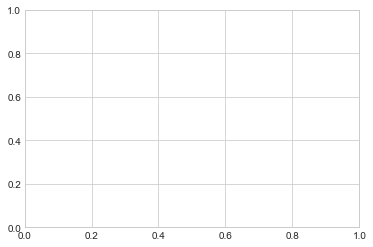

In [2]:
fig = plt.figure()
ax = plt.axes()


**在Matplotlib中，图形（类plt.figure的一个实例）可以被认为是一个包括所有维度、图像、文本和标签对象的容器。**

**维度 （类plt.Axes的一个实例）就是上面的图像，初始是一个有边界的格子包括刻度和标签，最终还有我们画在上面的图表元素。**

**一般情况下，用变量名fig来指代图形对象，变量名ax来指代维度变量。**

**一旦创建了维度，可以使用ax.plot方法将数据绘制在图标上。**

In [3]:
x = np.linspace(0, 10,1000)
ax.plot(x, np.sin(x))

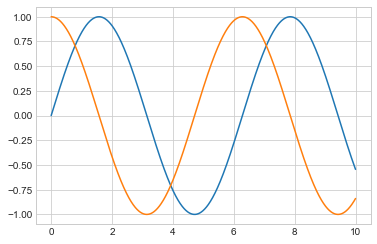

In [5]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

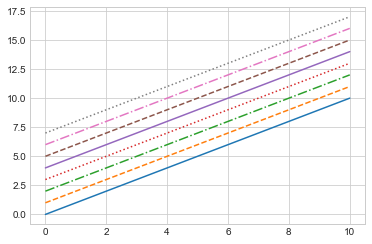

In [12]:
plt.plot(x, x+0, linestyle = 'solid')
plt.plot(x, x+1, linestyle = "dashed")
plt.plot(x, x+2, linestyle = "dashdot")
plt.plot(x, x+3, linestyle = "dotted")

plt.plot(x, x+4, linestyle = '-')    # 'solid'
plt.plot(x, x+5, linestyle = '--')   # “dashed”
plt.plot(x, x+6, linestyle = '-.')   # "dashdot"
plt.plot(x, x+7, linestyle = ':')    # ‘dotted'

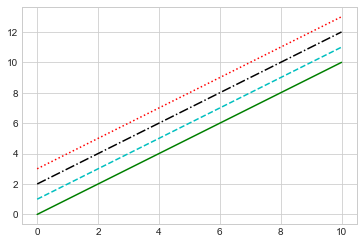

In [16]:
plt.plot(x, x+0, '-g')
plt.plot(x, x+1, '--c')   # celeste, azure 天青色
plt.plot(x, x+2, '-.k')  # black
plt.plot(x, x+3, ':r')    #red

- **RGB 颜色系统以及 CMYK 颜色系统**

### 坐标轴范围

(-1.5, 1.5)

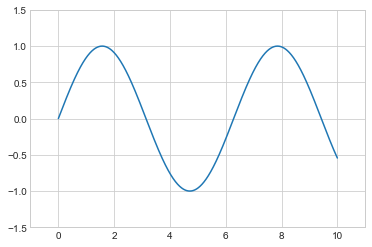

In [21]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

**坐标轴反向，将参数顺序颠倒即可**

(1.2, -1.2)

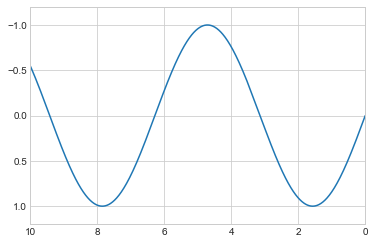

In [22]:
plt.plot(x, np.sin(x))
plt.xlim(10,0)
plt.ylim(1.2, -1.2)

[-1, 11, -1.5, 1.5]

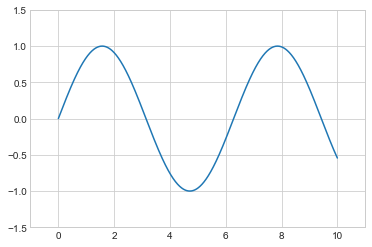

In [23]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])

(-0.5, 10.5, -1.0999971452300779, 1.099999549246729)

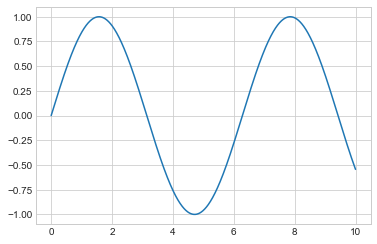

In [24]:
plt.plot(x, np.sin(x))
plt.axis('tight')    #将坐标轴压缩到足够绘制折线图像的大小

(-0.5, 10.5, -1.0999971452300779, 1.099999549246729)

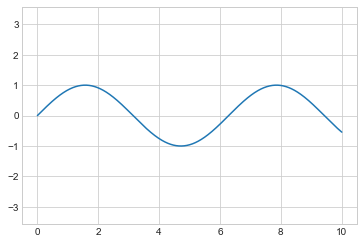

In [25]:
plt.plot(x, np.sin(x))
plt.axis('equal')    # 设置x轴和y轴使用相同的长度单位

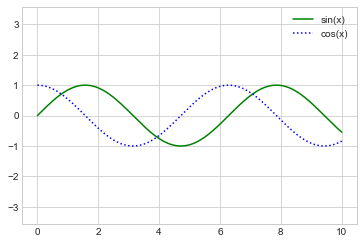

In [26]:
plt.plot(x, np.sin(x), '-g', label = 'sin(x)')
plt.plot(x, np.cos(x), ':b', label = 'cos(x)')
plt.axis('equal')
plt.legend()

plt.xlabel() -> ax.set_xlabel()
plt.ylabel() -> ax.set_ylabel()
plt.xlim() -> ax.set_xlim()
plt.ylim() -> ax.set_ylim()
plt.title() -> ax.set_title()


# 简单散点图

## 载入

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np



## 和折线图一样，用plt.plot()绘制散点图

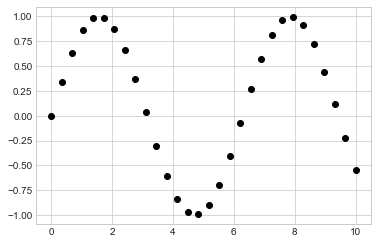

In [7]:
x = np.linspace(0,10,30)
y = np.sin(x)

plt.plot(x,y, 'o', color = 'black')    #传递给函数的第三个参数是使用一个字符代表的图表绘制点的类型。

**所有可用Marker**

(0, 1.8)

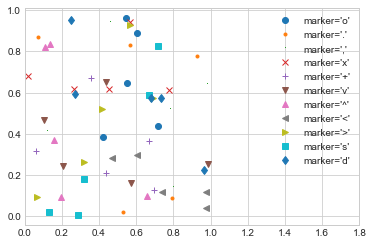

In [8]:
rng = np.random.RandomState(0)

for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label = "marker='{0}'".format(marker))
plt.legend(numpoints = 1)
plt.xlim(0, 1.8)

**这些符号代码可以和线条、颜色代码一起使用，在折线图基础上绘制出散点。**

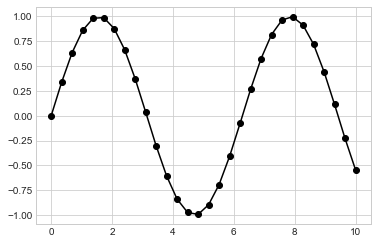

In [9]:
plt.plot(x,y,'-ok')

**其他一些参数用来指定广泛的线条和点的属性。**

(-1.2, 1.2)

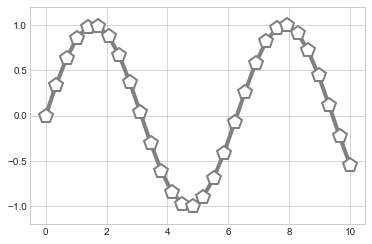

In [10]:
plt.plot(x,y, '-p', color = 'gray', markersize = 15, linewidth = 4,
        markerfacecolor = 'white', markeredgecolor = 'gray', markeredgewidth =2)
plt.ylim(-1.2, 1.2)

## 用plt.scatter()绘制散点图

- **plt.scatter()和plt.plot()的主要区别在于：plt.scatter()可以针对每个点设置不同的属性（大小、填充颜色、边缘颜色等），
还可以通过数据集合对这些属性进行设置。**

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0

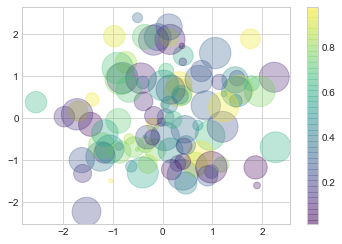

In [11]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
print(x)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x,y, c = colors, s = sizes, alpha = 0.3,
           cmap = 'viridis')
plt.colorbar()    #显示颜色对比条

**使用scikit-learn中的iris数据集**

Text(0, 0.5, 'sepal width (cm)')

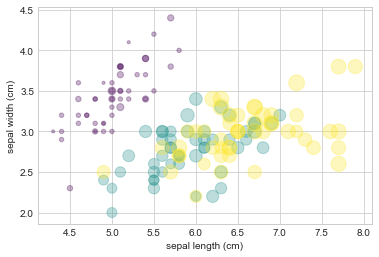

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha = 0.3,
           s = 100 * features[3], c = iris.target, cmap = 'viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

- **可以通过散点图同时展示该数据集中的四个不同维度：图中的（X,Y)位置代表每个样本的长度和宽度，散点的大小代表样本的花瓣的宽度，而散点的颜色代表一个特定花的类型**。


# 误差可视化

## 基础误差条

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


<ErrorbarContainer object of 3 artists>

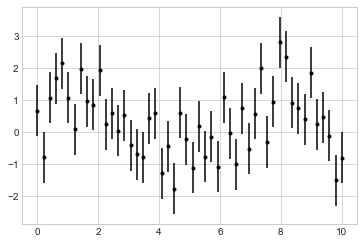

In [14]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x,y, yerr=dy, fmt = '.k')

-**fmt参数是用来控制线条和点风格的代码，与plt.plot有相同**


<ErrorbarContainer object of 3 artists>

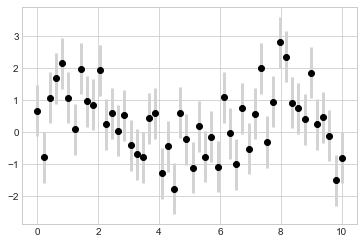

In [15]:
plt.errorbar(x,y, yerr=dy, fmt='o', color = 'black', 
             ecolor='lightgray', elinewidth=3, capsize = 0)